In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = 'C:/Users/baoth/Desktop/Learnmore/DS/machine_learning_PS/data/auto-mpg.csv'

In [3]:
df = pd.read_csv(path)
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
291,19.2,8,267.0,125,3605,15.0,79,1,chevrolet malibu classic (sw)
46,22.0,4,140.0,72,2408,19.0,71,1,chevrolet vega (sw)
272,23.8,4,151.0,85,2855,17.6,78,1,oldsmobile starfire sx
109,21.0,4,140.0,72,2401,19.5,73,1,chevrolet vega
261,18.1,6,258.0,120,3410,15.1,78,1,amc concord d/l


In [4]:
df = df.drop(columns=['car name','origin'],axis=1)

In [5]:
import datetime
now_year = int(str(datetime.date.today().year)[2:])
df['age'] = df['model year'].apply(lambda x: now_year - x + 100)

In [6]:
df[df['age'] < 0]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,age


In [7]:
df =df.drop('model year',axis=1)

In [8]:
df = df[df['horsepower'] != '?']
df['horsepower'] = df['horsepower'].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   age           392 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 24.5 KB


# Simple linear regression

In [10]:
from sklearn.model_selection import train_test_split

X = df['horsepower'].values
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [11]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True).fit(X_train.reshape(-1,1),y_train)

In [12]:
print('Training core: ', linear_model.score(X_train.reshape(-1,1),y_train))

Training core:  0.6140192478870399


In [13]:
y_pred = linear_model.predict(X_test.reshape(-1,1))

In [14]:
from sklearn.metrics import r2_score

print('Testing score: ', r2_score(y_test,y_pred))

Testing score:  0.5687458988526688


Text(0, 0.5, 'MPG')

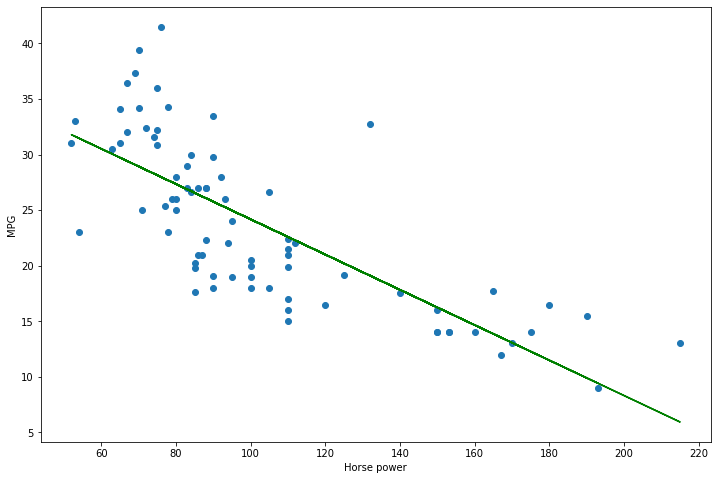

In [15]:
fig,ax = plt.subplots(figsize=(12,8))

plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,color = 'green')

plt.xlabel('Horse power')
plt.ylabel('MPG')

## Multiple Regression

In [16]:
X = df[['displacement','horsepower','weight']]
y = df['mpg']

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [17]:
linear_model.fit(X_train,y_train)

LinearRegression(normalize=True)

In [18]:
print('Training score: ',linear_model.score(X_train,y_train))

Training score:  0.701640835798518


In [19]:
predictors = X_train.columns
coef = pd.Series(linear_model.coef_,predictors).sort_values()

print(coef)

horsepower     -0.053657
weight         -0.005063
displacement   -0.003714
dtype: float64


In [20]:
y_pred = linear_model.predict(X_test)

241    22.0
394    44.0
142    26.0
140    14.0
357    32.9
       ... 
127    19.0
167    29.0
68     13.0
133    16.0
112    19.0
Name: mpg, Length: 79, dtype: float64

In [21]:
print('Testing score: ',r2_score(y_test,y_pred))

Testing score:  0.7222234031397274


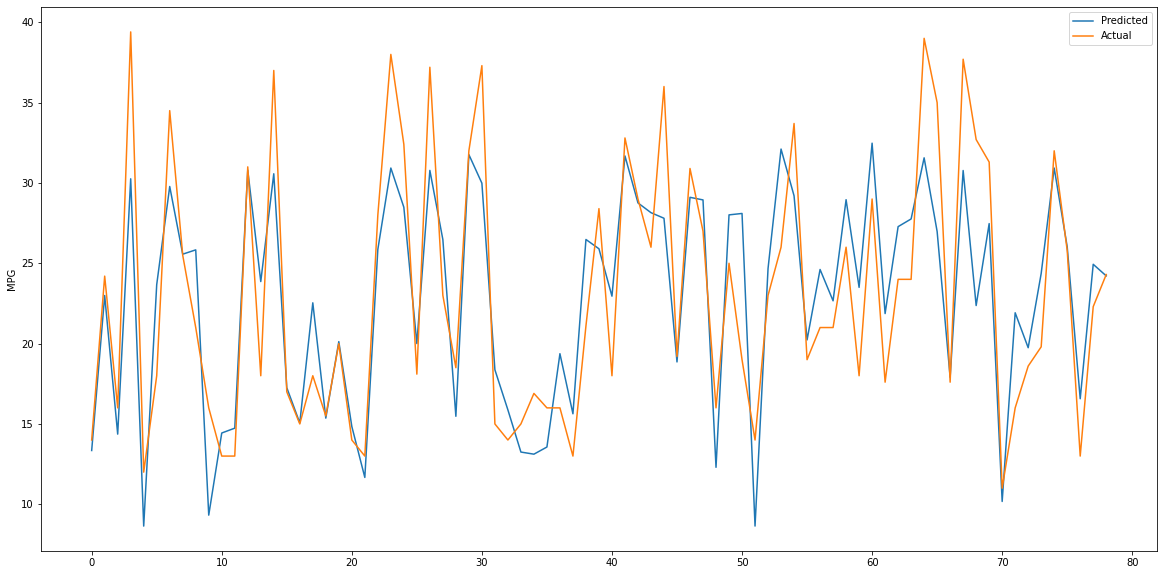

In [22]:
plt.figure(figsize = (20,10))
plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values,label='Actual')

plt.ylabel('MPG')
plt.legend()

In [23]:
X = df[['displacement','horsepower','weight', 'acceleration','cylinders']]
y = df['mpg']

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)
linear_model.fit(X_train,y_train)
print('Training score: ',linear_model.score(X_train,y_train))

Training score:  0.7090633620265412


In [24]:
predictors = X_train.columns
coef = pd.Series(linear_model.coef_,predictors).sort_values()

print(coef)

cylinders      -0.690990
acceleration   -0.102637
horsepower     -0.051525
weight         -0.004641
displacement    0.003152
dtype: float64


In [25]:
y_pred = linear_model.predict(X_test)

In [26]:
print('Testing score: ',r2_score(y_test,y_pred))

Testing score:  0.695718422650571


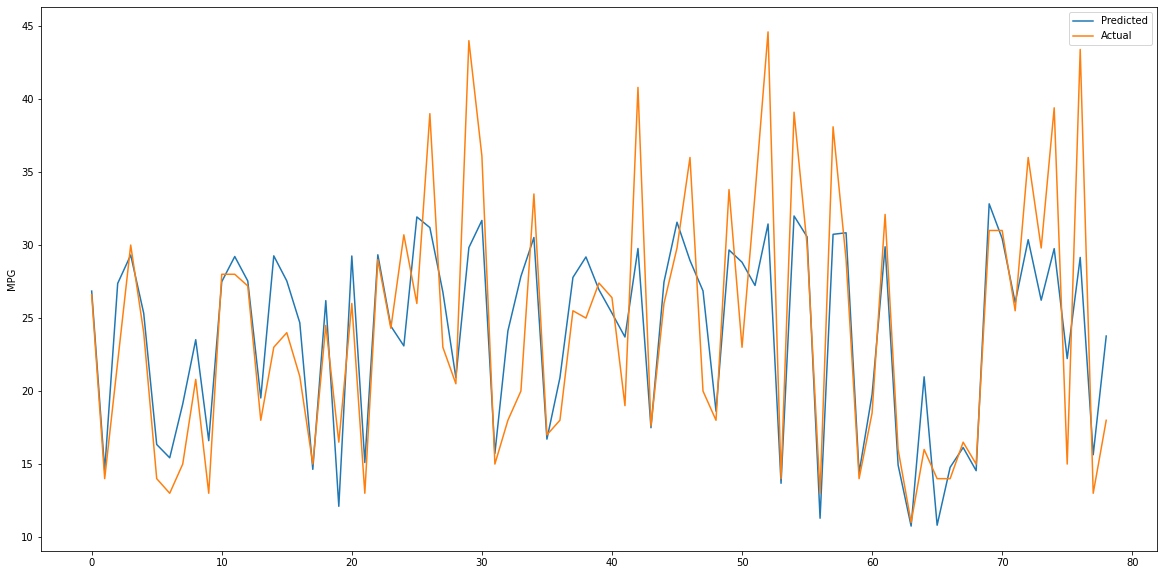

In [27]:
plt.figure(figsize = (20,10))
plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values,label='Actual')

plt.ylabel('MPG')
plt.legend()

# Others Regression models

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge, ElasticNet, Lars, SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

In [29]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,18.0,8,307.0,130.0,3504,12.0,51
1,15.0,8,350.0,165.0,3693,11.5,51
2,18.0,8,318.0,150.0,3436,11.0,51
3,16.0,8,304.0,150.0,3433,12.0,51
4,17.0,8,302.0,140.0,3449,10.5,51
5,15.0,8,429.0,198.0,4341,10.0,51
6,14.0,8,454.0,220.0,4354,9.0,51
7,14.0,8,440.0,215.0,4312,8.5,51
8,14.0,8,455.0,225.0,4425,10.0,51
9,15.0,8,390.0,190.0,3850,8.5,51


In [30]:
result_dict = {}

In [31]:
def build_model(regression_fn,
                name_of_y_col,
                features,
                dataset,
                test_frac=0.2,
                preprocess_fn=None,
                show_plot_Y=False,
                show_plot_scatter=False):
    X = dataset[features]
    y = dataset[name_of_y_col]

    if preprocess_fn is not None:
        X = preprocess_fn(X)

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_frac)
    model = regression_fn(X_train,y_train)

    y_pred = model.predict(X_test)

    print('Training score: ',model.score(X_train,y_train))
    print('Testing score: ',r2_score(y_test,y_pred))

    if show_plot_Y == True:
        fig,ax = plt.subplots(figsize=(12,8))
        plt.plot(y_pred, label='Predicted')
        plt.plot(y_test.values,label='Actual')

        plt.ylabel(name_of_y_col)
        plt.legend()
        plt.show()
    
    if show_plot_scatter == True:
        fig,ax = plt.subplots(figsize=(12,8))
        plt.scatter(X_test,y_test)
        plt.plot(X_test,y_pred,'green')

        plt.legend(['Predicted line','Observed data'])
        plt.show()
    return{
        'Train_score':model.score(X_train,y_train),
        'Testing_score': r2_score(y_test,y_pred)
    }

In [32]:
def compare_results():
    for key in result_dict:
        print('Regression: ',key)
        print('Training score: ',result_dict[key]['Train_score'])
        print('Test score: ',result_dict[key]['Testing_score'])
        print()

In [33]:
def linear_reg(X_train, y_train):
    model = LinearRegression(normalize=True)
    model.fit(X_train,y_train)
    return model

Training score:  0.6978468243617097
Testing score:  0.6676446073217106


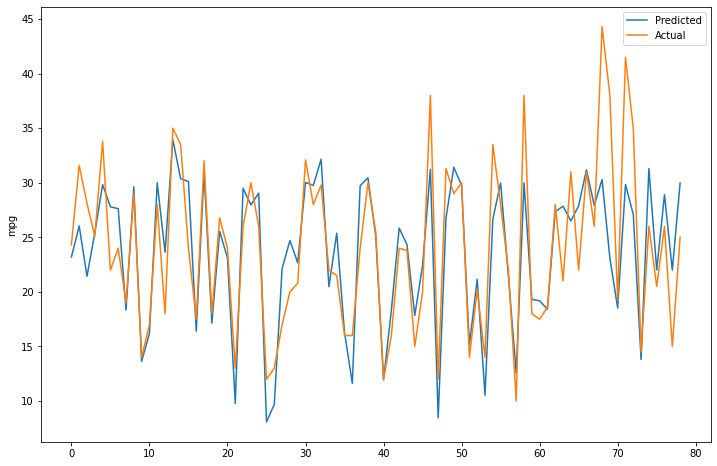

In [34]:
result_dict['mpg ~ single_linear'] = build_model(linear_reg,'mpg',['weight'],df,show_plot_Y=True)

Training score:  0.7092593450710258
Testing score:  0.6982032899428515


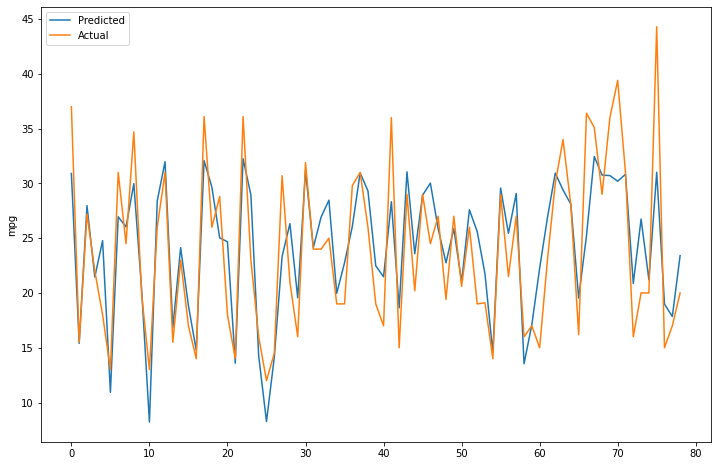

In [35]:
features = ['cylinders','displacement','horsepower','weight','acceleration']

result_dict['mpg ~ kitchen_sink_linear'] = build_model(linear_reg,'mpg',features,df,show_plot_Y=True)

Training score:  0.702210061628696
Testing score:  0.72114782167628


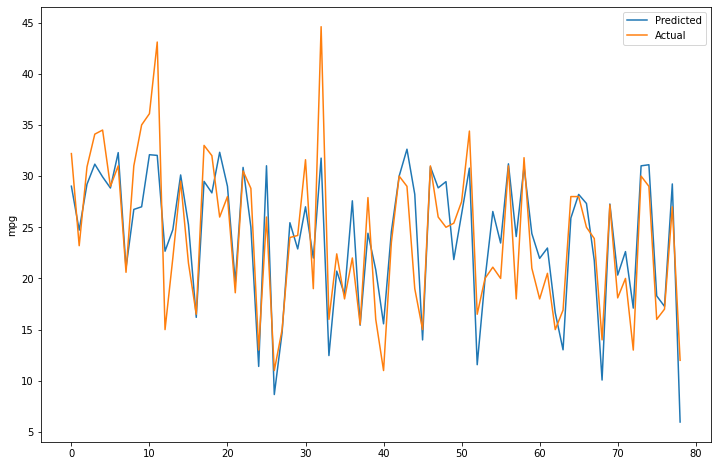

In [36]:
result_dict['mpg ~ parsimonius_linear'] = build_model(linear_reg,'mpg',['horsepower','weight'],df,show_plot_Y=True)

In [37]:
compare_results()

Regression:  mpg ~ single_linear
Training score:  0.6978468243617097
Test score:  0.6676446073217106

Regression:  mpg ~ kitchen_sink_linear
Training score:  0.7092593450710258
Test score:  0.6982032899428515

Regression:  mpg ~ parsimonius_linear
Training score:  0.702210061628696
Test score:  0.72114782167628



In [38]:
def lasso_reg(X_train, y_train,alpha=0.5):
    model = Lasso(alpha=alpha)
    model.fit(X_train,y_train)
    return model

Training score:  0.7124517264417491
Testing score:  0.6836937731163977


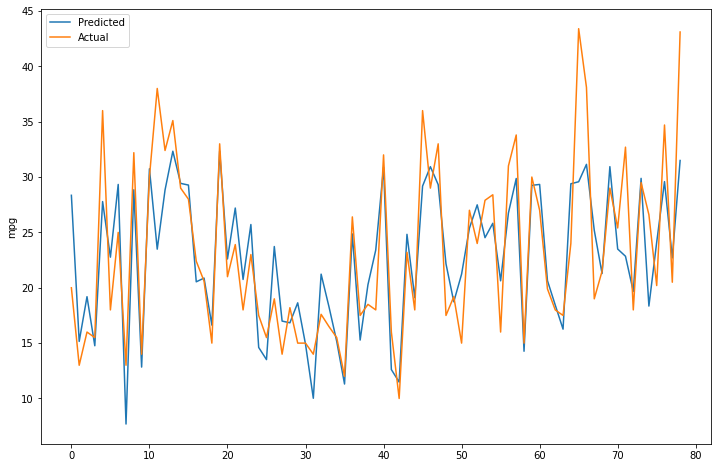

In [39]:
result_dict['mpg ~ kitchen_sink_lasso'] = build_model(lasso_reg,'mpg',features,df,show_plot_Y=True)

In [40]:
def ridge_reg(X_train,y_train,alpha=0.5,normalize=True):
    model = Ridge(alpha=alpha, normalize=normalize)
    model.fit(X_train,y_train)
    return model

Training score:  0.680608026590834
Testing score:  0.6835276722135808


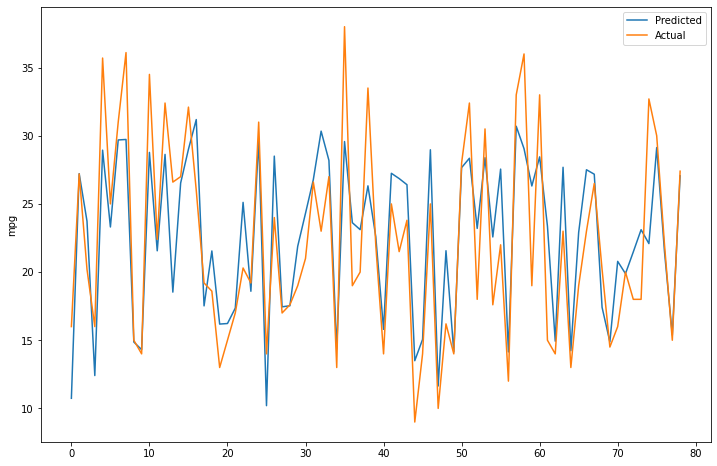

In [41]:
result_dict['mpg ~ kitchen_sink_ridge'] = build_model(ridge_reg,'mpg',features,df,show_plot_Y=True)

In [42]:
def elastic_net_reg(X_train,y_train):
    model = ElasticNet(alpha=0,l1_ratio=0.5,normalize=True,max_iter=10000,warm_start=True)
    model.fit(X_train,y_train)
    return model

Training score:  0.7054725711042695
Testing score:  0.7105501067517475


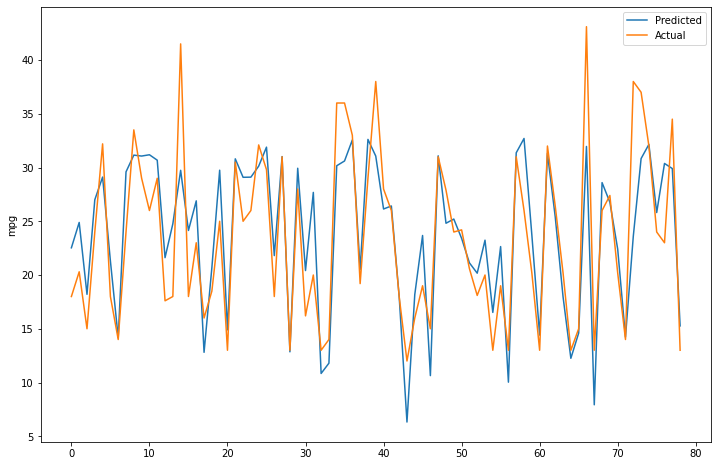

In [43]:
result_dict['mpg ~ kitchen_sink_elastic_net_OLS'] = build_model(elastic_net_reg,'mpg',features,df,show_plot_Y=True)

In [44]:
compare_results()

Regression:  mpg ~ single_linear
Training score:  0.6978468243617097
Test score:  0.6676446073217106

Regression:  mpg ~ kitchen_sink_linear
Training score:  0.7092593450710258
Test score:  0.6982032899428515

Regression:  mpg ~ parsimonius_linear
Training score:  0.702210061628696
Test score:  0.72114782167628

Regression:  mpg ~ kitchen_sink_lasso
Training score:  0.7124517264417491
Test score:  0.6836937731163977

Regression:  mpg ~ kitchen_sink_ridge
Training score:  0.680608026590834
Test score:  0.6835276722135808

Regression:  mpg ~ kitchen_sink_elastic_net_OLS
Training score:  0.7054725711042695
Test score:  0.7105501067517475



In [45]:
def svr_reg(X_train,y_train,kernel='linear',epsilon=0.05,C=0.3):
    model = SVR(kernel=kernel,epsilon=epsilon,C=C)
    model.fit(X_train,y_train)
    return model

Training score:  0.7080197308067246
Testing score:  0.6710089450233521


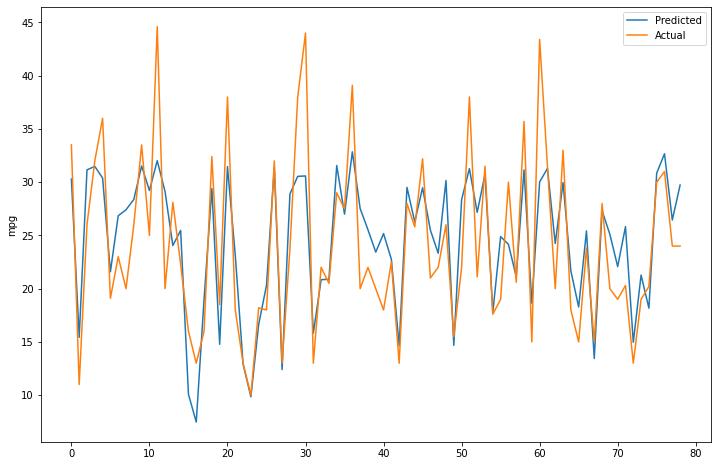

In [46]:
result_dict['mpg ~ kitchen_sink_svr'] = build_model(svr_reg,'mpg',features,df,show_plot_Y=True)

In [47]:
def kneighbors_reg(X_train,y_train,n_neighbors=10):
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train,y_train)
    return model

Training score:  0.7813341249274548
Testing score:  0.6488317084968205


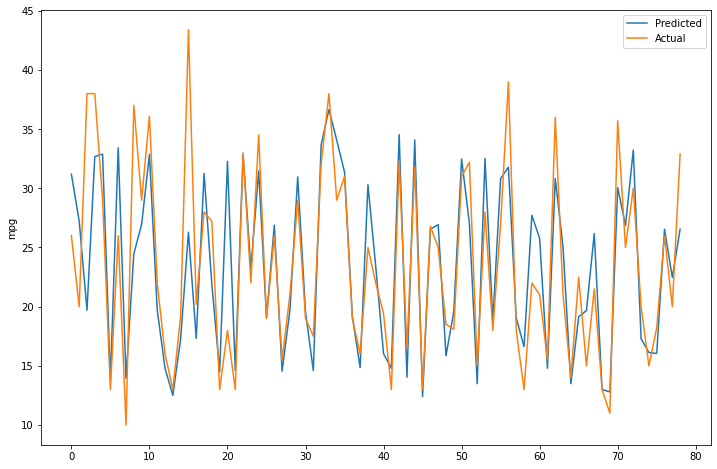

In [48]:
result_dict['mpg ~ kitchen_sink_Kneighbors'] = build_model(kneighbors_reg,'mpg',features,df,show_plot_Y=True)

In [49]:
def apply_standard_scaler(x):
    scaler = StandardScaler()
    scaler.fit(x)
    return scaler.transform(x)

In [51]:
def sgd_reg(X_train,y_train,max_iter=10000,tol=1e-3):
    model = SGDRegressor(max_iter=max_iter,tol=tol)
    model.fit(X_train,y_train)
    return model

Training score:  0.7135440548615286
Testing score:  0.6707348905485021


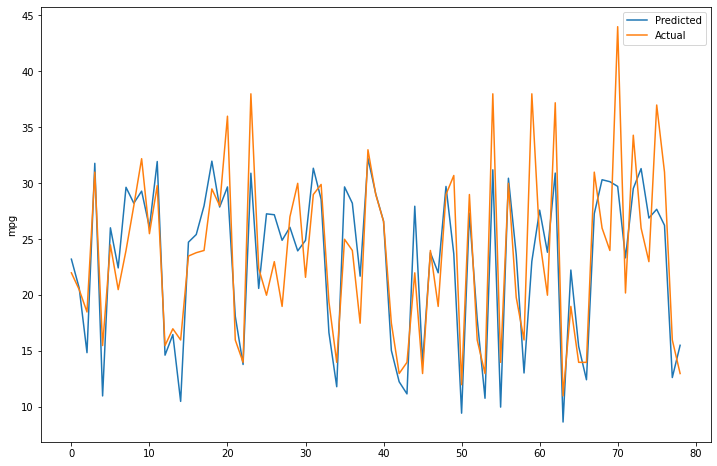

In [53]:
result_dict['mpg ~ kitchen_sink_sgd'] = build_model(sgd_reg,'mpg',features,df,show_plot_Y=True,preprocess_fn=apply_standard_scaler)

In [54]:
def decision_tree_reg(X_train,y_train, max_depth=2):
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train,y_train)
    return model

Training score:  0.7399514144230693
Testing score:  0.6795515522233837


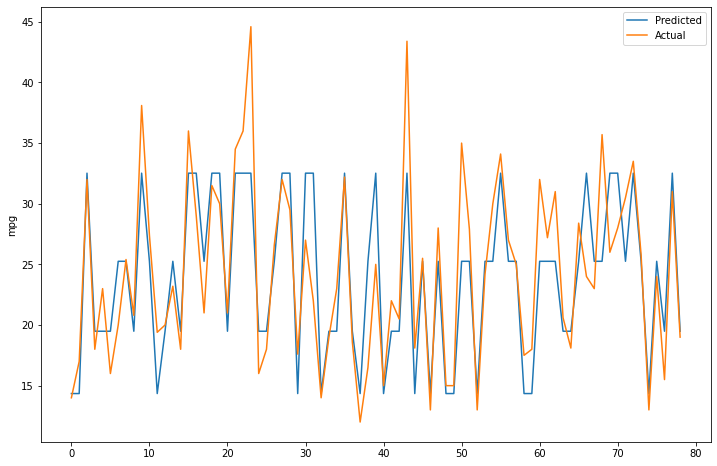

In [55]:
result_dict['mpg ~ kitchen_sink_DS_tree'] = build_model(decision_tree_reg,'mpg',features,df,show_plot_Y=True)

In [56]:
def least_angle_reg(X_train,y_train):
    model  = Lars(n_nonzero_coefs=4)
    model.fit(X_train,y_train)
    return model

Training score:  0.7193787408472374
Testing score:  0.6533798036442673


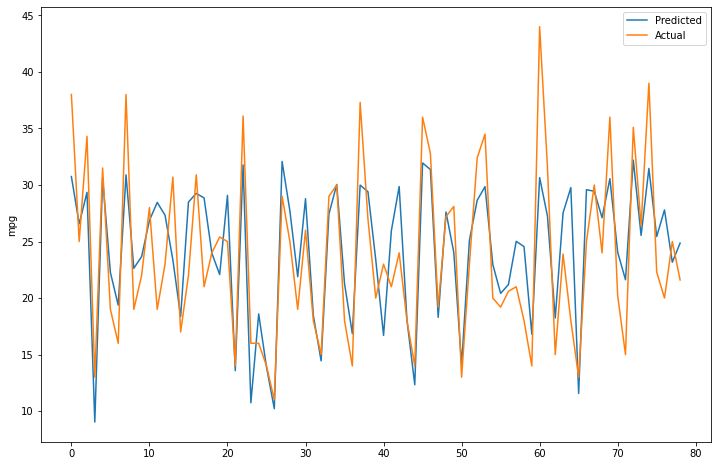

In [57]:
result_dict['mpg ~ kitchen_sink_lars'] = build_model(least_angle_reg,'mpg',features,df,show_plot_Y=True)

In [60]:
compare_results()

Regression:  mpg ~ single_linear
Training score:  0.6978468243617097
Test score:  0.6676446073217106

Regression:  mpg ~ kitchen_sink_linear
Training score:  0.7092593450710258
Test score:  0.6982032899428515

Regression:  mpg ~ parsimonius_linear
Training score:  0.702210061628696
Test score:  0.72114782167628

Regression:  mpg ~ kitchen_sink_lasso
Training score:  0.7124517264417491
Test score:  0.6836937731163977

Regression:  mpg ~ kitchen_sink_ridge
Training score:  0.680608026590834
Test score:  0.6835276722135808

Regression:  mpg ~ kitchen_sink_elastic_net_OLS
Training score:  0.7054725711042695
Test score:  0.7105501067517475

Regression:  mpg ~ kitchen_sink_svr
Training score:  0.7080197308067246
Test score:  0.6710089450233521

Regression:  mpg ~ kitchen_sink_Kneighbors
Training score:  0.7813341249274548
Test score:  0.6488317084968205

Regression:  mpg ~ kitchen_sink_sgd
Training score:  0.7135440548615286
Test score:  0.6707348905485021

Regression:  mpg ~ kitchen_sink_DS

# Hyperparameter with grid search

In [66]:
X = df[['horsepower','age']]
y = df['mpg']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [68]:
from sklearn.model_selection import GridSearchCV

In [75]:
parameters = {'alpha' : [0.2,0.4,0.6,0.7,0.8,0.9,1.0]}

grid_search = GridSearchCV(Lasso(),parameters,cv=3,return_train_score=True)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'alpha': 0.2}

In [76]:
lasso_reg = Lasso(alpha=grid_search.best_params_['alpha']).fit(X_train,y_train)

In [77]:
y_pred = lasso_reg.predict(X_test)

print('Training score: ', lasso_reg.score(X_train,y_train))
print('Testing score: ',r2_score(y_test,y_pred))

Training score:  0.6819098586215857
Testing score:  0.6930226081497514


In [80]:
parameters = {'n_neighbors':[10,12,14,18,25,30,35,50]}

grid_search = GridSearchCV(KNeighborsRegressor(),parameters,cv=3,return_train_score=True)
grid_search.fit(X_train,y_train)

grid_search.best_params_

{'n_neighbors': 10}

In [81]:
kneighbors_model = KNeighborsRegressor(n_neighbors=grid_search.best_params_['n_neighbors']).fit(X_train,y_train)

In [82]:
y_pred = kneighbors_model.predict(X_test)

print('Training score: ', lasso_reg.score(X_train,y_train))
print('Testing score: ',r2_score(y_test,y_pred))

Training score:  0.6819098586215857
Testing score:  0.8047489464161105


In [87]:
parameters = {'max_depth':[1,2,3,4,5,7,8]}

grid_search = GridSearchCV(DecisionTreeRegressor(),parameters,cv=3,return_train_score=True)
grid_search.fit(X_train,y_train)

grid_search.best_params_

{'max_depth': 3}

In [88]:
ds_model = DecisionTreeRegressor(max_depth=grid_search.best_params_['max_depth']).fit(X_train,y_train)

y_pred = kneighbors_model.predict(X_test)

print('Training score: ', lasso_reg.score(X_train,y_train))
print('Testing score: ',r2_score(y_test,y_pred))

Training score:  0.6819098586215857
Testing score:  0.8047489464161105


In [90]:
parameters = {'epsilon':[0.05,0.1,0.2,0.3],'C':[0.2,0.3]}

grid_search = GridSearchCV(SVR(kernel='linear'),parameters,cv=3,return_train_score=True)
grid_search.fit(X_train,y_train)

grid_search.best_params_

{'C': 0.3, 'epsilon': 0.1}

In [91]:
Svr_model = SVR(kernel='linear',epsilon=grid_search.best_params_['epsilon'],C=grid_search.best_params_['C'])

y_pred = kneighbors_model.predict(X_test)

print('Training score: ', lasso_reg.score(X_train,y_train))
print('Testing score: ',r2_score(y_test,y_pred))

Training score:  0.6819098586215857
Testing score:  0.8047489464161105
